In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import torchvision.transforms as transforms

In [3]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

In [4]:
model = torch.load('face.pth')

In [114]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.5, -0.456/0.5, -0.406/0.5],
    std=[1/0.5, 1/0.5, 1/0.5]
)

def get_image(model):
  noise = torch.randn(20, 100, 1, 1)
  output = model(noise)
  inv_tensor = inv_normalize(output)
  output = inv_tensor.permute(0,2,3,1).detach().numpy()
  return output

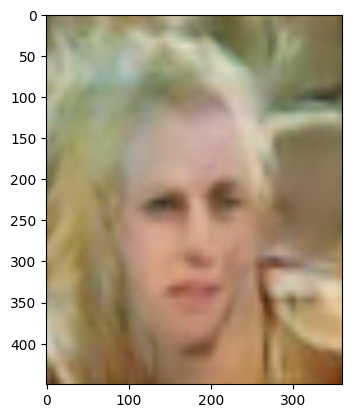

In [115]:
face =get_image(model)
face =cv2.resize(face[0],(360,450))
plt.imshow(face)

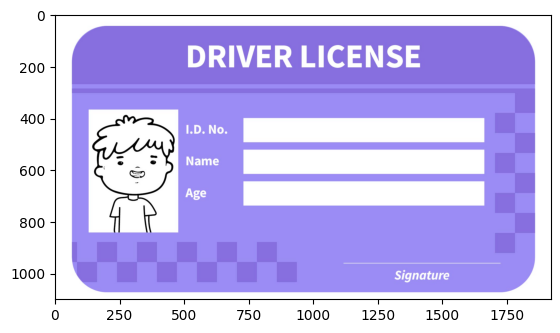

In [116]:
template = cv2.imread("DL_template.jpg")[400:1500, : ,:]

plt.imshow(template)

# Add Face

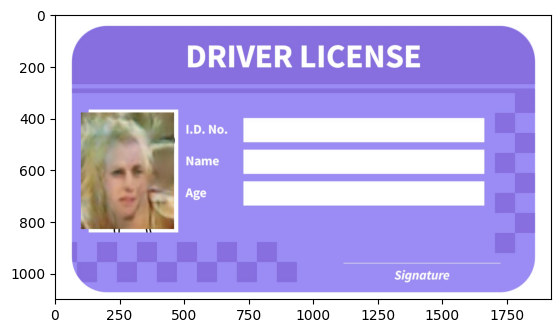

In [117]:
pivot_x = 380
pivot_y = 100
template[pivot_x:pivot_x+face.shape[0], pivot_y:pivot_y+face.shape[1], :] = face*255
plt.imshow(template)

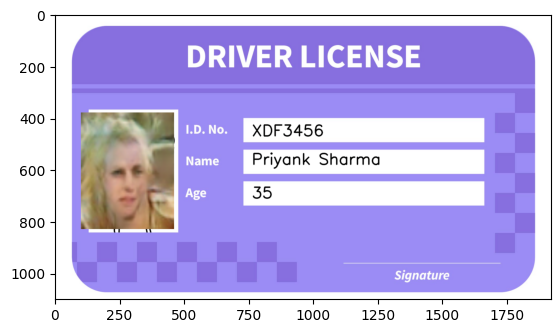

In [118]:
def add_text(image, text , pos):

  # font
  font = cv2.FONT_HERSHEY_SIMPLEX
  # org
  org = (760, 440)
  # fontScale
  fontScale = 2
  # Blue color in BGR
  color = (0, 0, 0)

  # Line thickness of 2 px
  thickness = 3

  # Using cv2.putText() method
  image = cv2.putText(image, text , pos, font,
                    fontScale, color, thickness, cv2.LINE_AA)
  return image

image = template.copy()
image= add_text(image, "XDF3456", (760, 470))
image= add_text(image, "Priyank Sharma", (760, 580))
image= add_text(image, "35", (760, 710))
plt.imshow(image)